In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from analysis_utils import get_run_data, add_significance_marks, METRICS, metrics_names, aggregate_metrics
# metric_groups = METRICS["metric_groups"]
# metric_names = METRICS["metric_names"]
# metric_mode = METRICS["metric_mode"]

In [21]:
data, config = get_run_data("eli-carrami/Cprt-Paper-Final")
best_basis = "biochem/val_cofactor"
out = []
for d, c in zip(data, config):
    if len(d) > 0:
        d["avg_binary_loc_f1"] = d[[col for col in d.columns if "_in_" in col]].mean(axis=1)
        h = d.iloc[d[best_basis].idxmax()]
        h['esm'] = c['model']['value']['protein_model']
        h['llm'] = c['model']['value']['language_model']
        h['strategy'] = c['model']['value']['multimodal_strategy']
        h['split'] = c['datamodule']['value']['split_ratios']
        h['subsample'] = c['datamodule']['value']['subsample_data']
        h['fields'] = c['datamodule']['value']['data_field_names']
        h['seed'] = c['seed']['value']
        out.append(h)


/var/folders/nv/z1jxx0450bl2tkfsvqfvmzz00000gn/T/ipykernel_77424/1785159251.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h['esm'] = c['model']['value']['protein_model']
/var/folders/nv/z1jxx0450bl2tkfsvqfvmzz00000gn/T/ipykernel_77424/1785159251.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h['esm'] = c['model']['value']['protein_model']
/var/folders/nv/z1jxx0450bl2tkfsvqfvmzz00000gn/T/ipykernel_77424/1785159251.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [24]:
d

,trainer/global_step,loss/val_loss,biochem/val_cofactor,biochem/val_in_nucleus_f1,biochem/val_in_membrane_f1,biochem/val_in_mitochondria_f1,biochem/val_is_enzyme_f1,biochem/val_is_enzyme_hard_f1,biochem/val_is_fake_f1,biochem/val_is_real_f1,...,metrics/val_rougeL_precision,metrics/val_rougeL_recall,metrics/val_rougeLsum_fmeasure,metrics/val_rouge1_fmeasure,metrics/val_rouge2_fmeasure,metrics/val_rouge1_precision,metrics/val_rougeL_fmeasure,metrics/val_rouge1_recall,metrics/val_perplexity,avg_binary_loc_f1
0,11024,0.718023,0.259912,0.122838,0.197185,0.041253,0.836966,0.841223,0.235314,0.969912,...,0.731009,0.603487,0.662809,0.675371,0.512532,0.748646,0.659933,0.617298,2.051137,0.120425
1,22049,0.678781,0.244493,0.135474,0.197723,0.050829,0.819159,0.823074,0.217280,0.955067,...,0.738228,0.608507,0.669211,0.680012,0.519841,0.754181,0.665909,0.621213,1.970300,0.128008
2,33074,0.642975,0.261013,0.123091,0.197185,0.041253,0.784658,0.797184,0.062166,0.963896,...,0.738774,0.612057,0.671113,0.682807,0.522739,0.755307,0.668267,0.625111,1.900718,0.120510
3,44099,0.622990,0.255507,0.124355,0.197185,0.042116,0.838175,0.840410,0.190084,0.966135,...,0.739838,0.614139,0.672967,0.684110,0.525424,0.755936,0.669923,0.626894,1.862655,0.121219
4,55124,0.611586,0.247797,0.179279,0.197185,0.050991,0.839759,0.837569,0.224950,0.949443,...,0.744699,0.616690,0.676323,0.688257,0.531178,0.761662,0.673444,0.629918,1.841395,0.142485
5,66149,0.599423,0.345815,0.180385,0.206927,0.054035,0.824290,0.844369,0.152129,0.975893,...,0.748776,0.618743,0.679174,0.690861,0.534810,0.765407,0.676342,0.631704,1.819031,0.147116
6,77174,0.594206,0.348018,0.141241,0.197943,0.047807,0.839244,0.839536,0.236037,0.971897,...,0.745776,0.618679,0.677958,0.687742,0.533591,0.760075,0.675081,0.630100,1.809420,0.128997
7,88199,0.583791,0.280837,0.123597,0.197185,0.041253,0.853785,0.852528,0.222262,0.976095,...,0.750022,0.620251,0.680608,0.690598,0.536710,0.764569,0.677748,0.631819,1.790527,0.120678
8,99224,0.578995,0.340308,0.122838,0.197185,0.041253,0.842773,0.838724,0.203048,0.975285,...,0.749683,0.621965,0.681371,0.691651,0.539068,0.764458,0.678621,0.633684,1.781807,0.120425
9,110249,0.573446,0.410793,0.123091,0.197185,0.041469,0.849851,0.850074,0.242493,0.965918,...,0.746725,0.621221,0.679705,0.691094,0.535964,0.762855,0.676976,0.633849,1.772035,0.120582


In [22]:
model_order = [0.1, 1.0, 1.5]
var = 'subsample'
ordering = (var, model_order)
df = pd.DataFrame(out).reset_index(inplace=False, drop=True)
df["subsample"] = df["subsample"] + df["fields"].apply(lambda x: 0 if x=="qa" else 0.5)
df=df[df.strategy=="soft-prompt"]
df=df[df.split.apply(lambda x: x == [0.945, 0.005, 0.05])]
df=df[df.esm=="esm2_t33_650M_UR50D"]
df["avg_binary_loc_f1"] = df[[col for col in df.columns if "_in_" in col]].mean(axis=1)
df = df[df[ordering[0]].isin(ordering[1])]
df[ordering[0]] = pd.Categorical(df[ordering[0]], categories=ordering[1], ordered=True)
df.sort_values([ordering[0], 'seed'], inplace=True)

In [23]:
metrics_names = {k:v for k, v in metrics_names.items() if 'rouge' not in k}
agg_df = aggregate_metrics(df, group_by='subsample')
agg_df = agg_df[[col for col in metrics_names]]

for col, name in metrics_names.items():
    agg_df[name] = round(agg_df[(col, 'mean')], 3).astype(str) + " (" + round(agg_df[(col, 'std')], 3).astype(str) + ")"
    agg_df.drop([(col, 'mean'), (col, 'std')], axis=1, inplace=True)

agg_df.to_clipboard()

/Users/elicarrami/PycharmProjects/cprt/cprt/analysis/analysis_utils.py:100: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby(group_by).agg(['mean', 'std'])


In [5]:
# model_order = ["gpt2", "gpt2-medium", "gpt2-xl", "microsoft/phi-2"]
# var = 'llm'
#
# fltr = ('strategy', "soft-prompt")
# ordering = (var, model_order)
# df = process_run_data(out, fltr, ordering)

/Users/elicarrami/PycharmProjects/cprt/cprt/analysis/analysis_utils.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby(group_by).agg(['mean', 'std'])
/var/folders/nv/z1jxx0450bl2tkfsvqfvmzz00000gn/T/ipykernel_55819/30439388.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  x.set_xticklabels(metric_names[idx], fontsize=label_size)
/Users/elicarrami/PycharmProjects/cprt/cprt/analysis/analysis_utils.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby(group_by).agg(['mean', 'std'])
/var/fo

0.1 1.5 biochem/val_is_real_f1 0.5069143561623636 0.01955862273903529
0.1 1.5 biochem/val_is_enzyme_f1 0.8079480209809244 1.1055828956343603
0.1 1.5 biochem/val_kingdom_f1 0.0824264643432577 -2.1473072445965236
0.1 1.5 biochem/val_localization_f1 0.34315296088821745 -0.46721343638695834
0.1 1.5 biochem/val_cofactor 0.3619845238033464 -0.4061459975281239
0.1 1.5 avg_binary_loc_f1 0.004810557216580356 -10.12128846068561
0.1 1.5 biochem/val_is_fake_f1 0.2798689718642572 -0.6934467575486755
0.1 1.5 biochem/val_mw_error 0.01813954398317829 5.106204663930192
0.1 1.5 metrics/val_rouge1_fmeasure 0.923849311185914 2.2598988015271764
0.1 1.5 metrics/val_rouge1_precision 0.8824434992936427 1.6792505608967805
0.1 1.5 metrics/val_rouge1_recall 0.9391064465775268 2.5968193646783173
0.1 1.5 metrics/val_rouge2_fmeasure 0.9796817989810831 4.808206282971174
0.1 1.5 metrics/val_rouge2_precision 0.9488089425037826 2.8799839285416096
0.1 1.5 metrics/val_rouge2_recall 0.9957203152640418 10.739328875656662
0

/Users/elicarrami/PycharmProjects/cprt/cprt/analysis/analysis_utils.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby(group_by).agg(['mean', 'std'])
/var/folders/nv/z1jxx0450bl2tkfsvqfvmzz00000gn/T/ipykernel_55819/30439388.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  x.set_xticklabels(metric_names[idx], fontsize=label_size)


0.1 1.5 metrics/val_perplexity 0.9667554119968257 -3.682015195902699


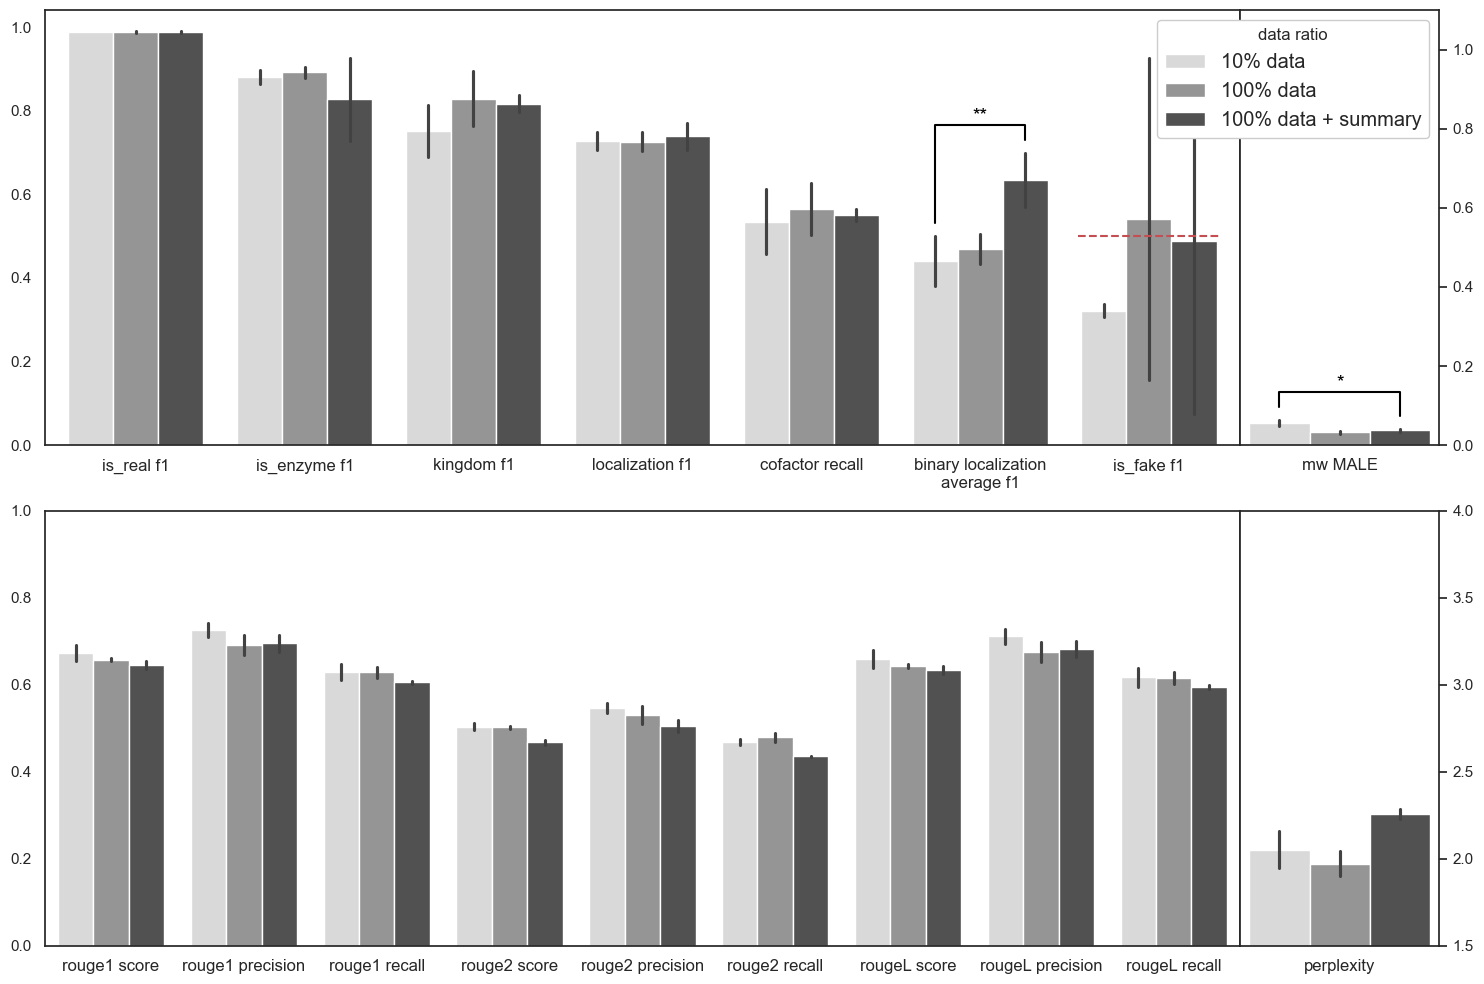

In [10]:
sns.set(style="white")
label_size=12

plot_configs = {
    "palette": sns.color_palette("Greys", len(model_order)),
    "x": 'variable', "y": 'value', "hue": var, "errorbar": 'sd'
}

df_melted = df.melt(id_vars=var, value_vars=df.columns.drop(var))

fig = plt.figure(figsize=(15, 10))
ax0 = plt.subplot2grid((2, 7), (0, 0), colspan=6, fig=fig)
ax1 = plt.subplot2grid((2, 7), (0, 6), colspan=1, fig=fig)
ax2 = plt.subplot2grid((2, 7), (1, 0), colspan=6, fig=fig)
ax3 = plt.subplot2grid((2, 7), (1, 6), colspan=1, fig=fig)

ax1.set_ylim([0, 1.1])
ax1.set_ylim([0, 1.1])
ax2.set_ylim([0, 1])
ax3.set_ylim([1.5, 4])

for idx, x in enumerate([ax0, ax1, ax2, ax3]):
    sns.barplot(data=df_melted[df_melted['variable'].isin(metric_groups[idx])], ax=x, order=metric_groups[idx], **plot_configs)
    add_significance_marks(x, df, var, metric_groups[idx], model_order, metric_mode[idx])
    x.set_xticklabels(metric_names[idx], fontsize=label_size)
    x.set_xlabel('')
    x.set_ylabel('')

ax0.legend().remove()
handles, _ = ax1.get_legend_handles_labels()
leg = ax1.legend(handles=handles, labels=["10% data", "100% data", "100% data + summary"], title='data ratio', loc='upper right', fontsize='large')
leg.get_frame().set_alpha(1)
ax2.legend().remove()
ax3.legend().remove()

ax1.yaxis.tick_right()
ax3.yaxis.tick_right()

fig.tight_layout()
fig.subplots_adjust(hspace=0.15, wspace=0)
l, r = ax2.get_xlim()
# ax2.set_xlim([l+0.3, r-0.3])
l, r = ax0.get_xlim()
ax0.set_xlim([l+0.2, r-0.2])
ax3.set_xlim(ax1.get_xlim())

x1 = ax0.patches[len(metric_groups[0]) - 1].get_x() - 0.02
p2_id = len(metric_groups[0]) * len(model_order) - 1
x2 = ax0.patches[p2_id].get_x() +ax0.patches[p2_id].get_width() + 0.02
ax0.plot([x1, x2], [0.5, 0.5], 'r--', lw=1.5)
# ax0.text((x1 + x2) / 2, 0.51, "random guess", ha='center', va='bottom', fontsize=14, color='r')
#
# sns.set(style="white")
# label_size=12
#
# plot_configs = {
#     "palette": sns.color_palette("Greens", len(model_order)),
#     "x": 'variable', "y": 'value', "hue": var, "errorbar": 'sd'
# }
#
# df_melted = df.melt(id_vars=var, value_vars=df.columns.drop(var))
#
# fig = plt.figure(figsize=(15, 10))
# ax0 = plt.subplot2grid((2, 7), (0, 0), colspan=1, fig=fig)
# ax1 = plt.subplot2grid((2, 7), (0, 1), colspan=5, fig=fig)
# ax2 = plt.subplot2grid((2, 7), (0, 6), colspan=1, fig=fig)
# ax3 = plt.subplot2grid((2, 7), (1, 0), colspan=7, fig=fig)
#
# for idx, x in enumerate([ax0, ax1, ax2, ax3]):
#     sns.barplot(data=df_melted[df_melted['variable'].isin(metric_groups[idx])], ax=x, order=metric_groups[idx], **plot_configs)
#     add_significance_marks(x, df, var, metric_groups[idx], model_order, metric_mode[idx])
#     x.set_xticklabels(metric_names[idx], fontsize=label_size)
#     x.set_xlabel('')
#     x.set_ylabel('')
#
# ax0.legend().remove()
# ax0.set_ylim([1, 5])
#
#
#
# ax2.yaxis.tick_right()
# ax2.set_ylim([0, 1])
# leg = ax1.legend(title='LLM', loc='upper right', fontsize='large')
# leg.get_frame().set_alpha(1)
# ax2.legend().remove()
#
# ax3.legend().remove()
# ax3.set_ylim([0, 1])
#
# plt.tight_layout()
# plt.subplots_adjust(hspace=0.1, wspace=0.25)
# pos = ax2.get_position()
# ax2.set_position([pos.x0 - 0.01, pos.y0, pos.width, pos.height])
plt.savefig("scale_metrics.png")